<a href="https://colab.research.google.com/github/DeepaliJosh/GRIP-JUN23/blob/main/GRIP_JUN23_DEEPALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DEEPALI JOSH**
#**The Sparks Foundation Data Science and Business Analytics Tasks**


#**Prediction using Decision tree algorithm**

# **GRIP-@THE SPARKS FOUNDATION**


**As part of my internship at The Sparks Foundation, This is a machine learning task that involves using a Decision Tree algorithm to make predictions using the Iris dataset.**

**> Importing the required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Load the Dataset**

In [ ]:
iris=pd.read_csv("/content/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Here's the shape, info and statistical distributions of our dataset**

In [ ]:
iris.shape

(150, 6)

**150 - Total number of Rows**


**6 - Total number of columns/attributes**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking the datatypes of the features or attributes of our data**

In [ ]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**To Check if there are any null values present in the data set**

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Here, we can observe that there are no missing values in our data set**

**Now, we drop ID column from our Data set**

We, remove Id column as it doesn't have any role in deciding the Species of Iris Flower

In [ ]:
Iris=iris.drop(['Id'],axis =1)

In [ ]:
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Exploratory Data Analysis

**Distribution of our target feature i.e Species**

In [ ]:
Iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Visualization**

In [ ]:
fig = px.histogram(Iris, y='Species', title='Count of Species',color_discrete_sequence=['#FFA500'])

fig.update_layout(yaxis_title='Species', xaxis_title='Count')

**Here, we observe that there are equal number of tuples for all classes of Species. (Balanced Dataset)**

In [ ]:
fig = px.bar(Iris, x=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], y="Species",
             title="Sum of Variables by Species")
fig.show()

**The given visualization is a bar chart that shows the sum of the sepal length, sepal width, petal length, and petal width for each species of the dataset, providing insights into the overall measurement totals across different species.**

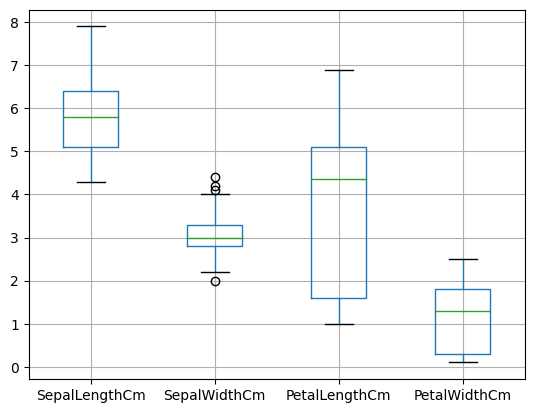

In [ ]:
box = Iris.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

**The above visualization is a box plot for all the 4 attributes in our dataset 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' and 'PetalWidthCm'.
Here, we observe that the column SepalWidthCm contains outliers in our dataset.**

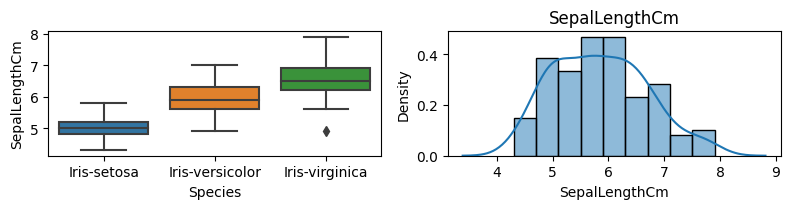

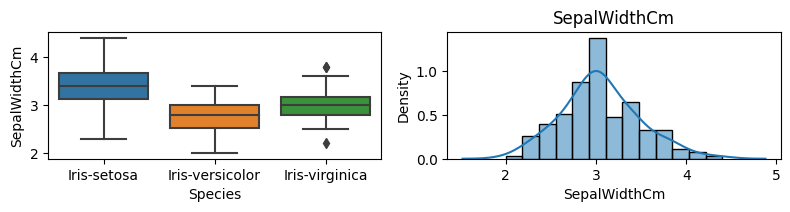

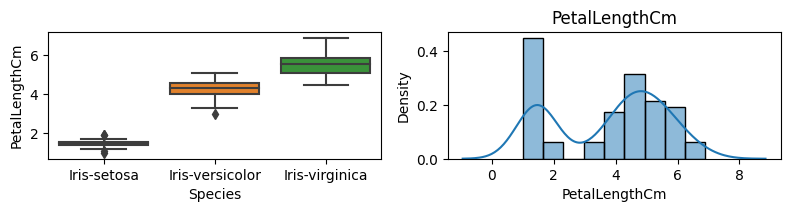

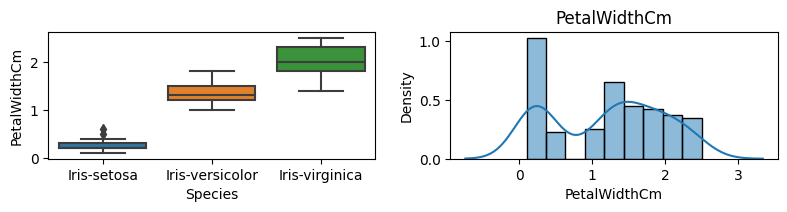

In [ ]:
plots = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in plots:
    plt.figure(figsize = (12, 2))
    plt.subplot(1,3,1)
    sns.boxplot(data= Iris, y=Iris[i],x='Species')
    plt.subplot(1,3,2)
    sns.histplot(Iris[i], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.tight_layout()
    plt.title(i)
    plt.show()

**Sepal Length in Centimeters**

1. The first subplot of the box plot suggests that Iris-setosa exhibits the shortest sepal length, typically ranging from 4 to 6 centimeters. On the other hand, Iris-virginica tends to have the longest sepal length, falling within the range of 6 to 8 centimeters.

2. The distribution plot in the second subplot reveals that the distribution of sepal length in centimeters is zero skewed. This indicates that the majority of the species in the dataset tend to have sepal lengths predominantly concentrated around 5 to 7 centimeters.

**Sepal Width in Centimeters**


1. In the 2nd row the 1st subplot i.e the box plot suggests that Iris-setosa exhibits the longest sepal width, typically ranging from 3 to 4 centimeters. On the other hand, Iris-versicolor tends to have the shortest sepal width, falling within the range of 2 to 3 centimeters.

2. The distribution plot in the second subplot reveals that the distribution of sepal width in centimeters is zero skewed. This indicates that the majority of the species in the dataset tend to have sepal width predominantly concentrated around 3 centimeters.


**Petal Length in Centimeters**

1.   In the 3rd row the first subplot i.e box plot suggests that Iris-setosa exhibits the shortest petal length, typically ranging from 0 to 2 centimeters. On the other hand, Iris-virginica tends to have the longest petal length, falling within the range of 4 to 6 centimeters.



2. The distribution plot in the second subplot reveals that the distribution of petal length in centimeters is bimodal distribution and is negatively skewed. This indicates that the species in the dataset tend to have petal lengths predominantly concentrated around 0 to 2 and 4 to 6 centimeters (most of the species lie between 4 to 6 cm).


**Petal Width in Centimeters**

1. In the 4th row the first subplot i.e box plot suggests that Iris-setosa exhibits the shortest petal width, typically ranging from 0 to 1 centimeters. On the other hand, Iris-virginica tends to have the longest petal width, falls around 2 centimeters.

2. The distribution plot in the second subplot reveals that the distribution of petal width in centimeters is bimodal distribution. This indicates that the species in the dataset tend to have petal width predominantly concentrated around 0 to 0.5 and 1.5 to 2.5 centimeters.

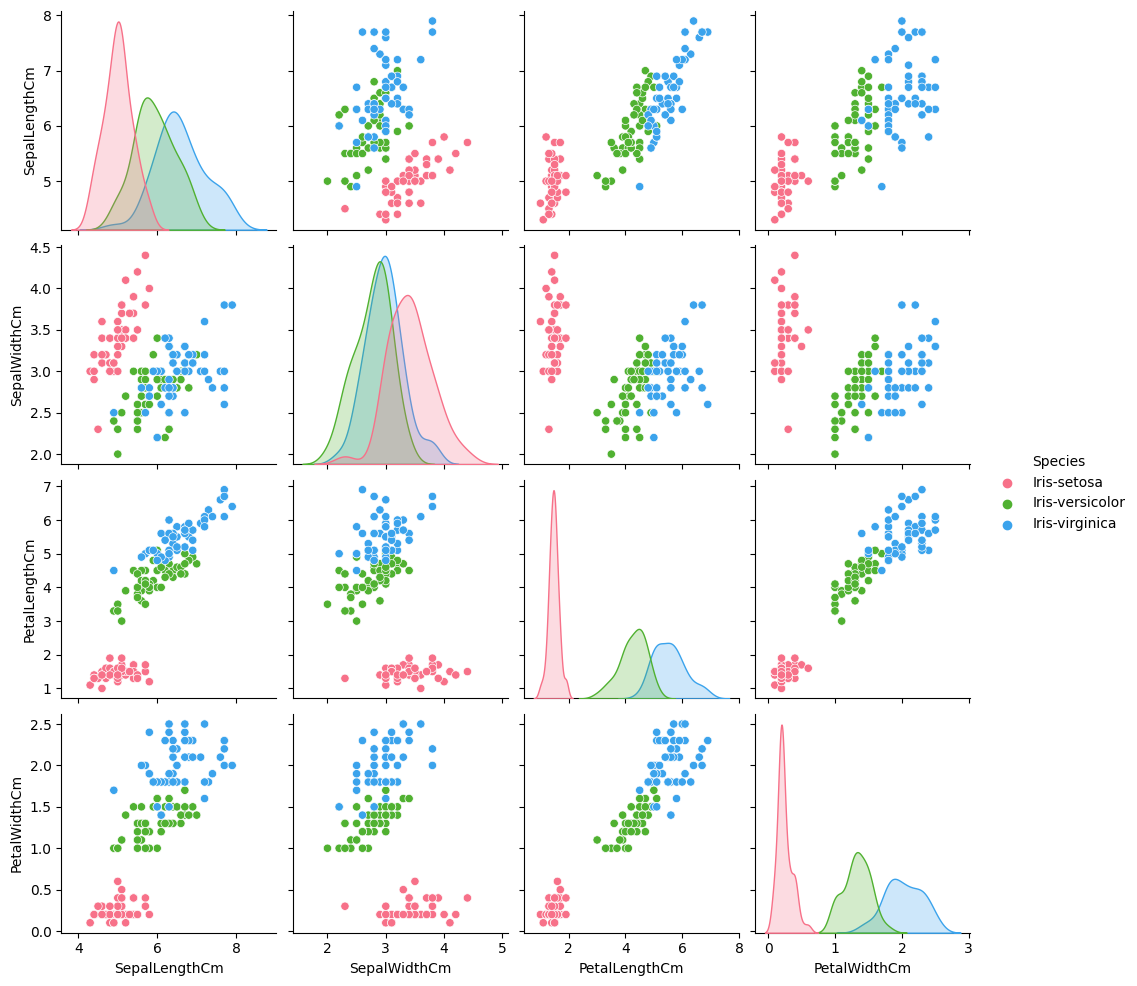

In [ ]:
sns.pairplot(Iris, hue = 'Species',palette = 'husl')



1.    We can observe that the sepal length and petal length have a strong positive correlation, while sepal width and petal width show less distinct patterns.
2.   Additionally, the species can be differentiated based on their characteristic clusters in the scatter plots, indicating the potential for effective classification based on these variables.
3.  We can say that Iris-setosa are linearly seperable from other two species. Other two species are not linearly seperable from each other.













**Correlation Matrix**

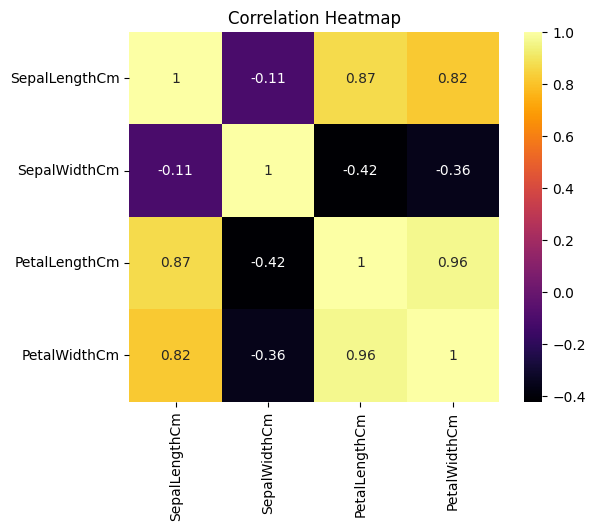

In [ ]:
sns.heatmap(Iris.corr(numeric_only=True), annot=True, cmap='inferno', square=True)
plt.title('Correlation Heatmap')
plt.show()

**As, Species is in the form of categorical data .So, it must be encoded into numeric value.For this we have used Label Encoder()**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Iris['Species']= label_encoder.fit_transform(Iris['Species'])
Iris['Species'].unique()

array([0, 1, 2])

**Split the data into X and Y**

In [ ]:
X = Iris.drop(['Species'], axis = 1)
Y = Iris['Species']

**Data split into train and test sets for model evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

**Training the model using the data**


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

#Model Evaluation

**Accuracy Score**

In [ ]:
from sklearn import metrics
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with Decision Tree: 96.00%


**Confusion Matrix**

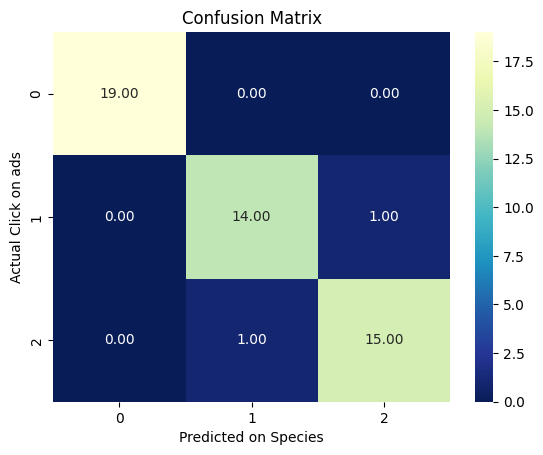

In [ ]:
#Plotting the confusion matrix to evaluate the accuracy
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm2,annot=True,cmap='YlGnBu_r',fmt='.2f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Click on ads')
plt.xlabel('Predicted on Species')
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



**Visualization of our Decision Tree**

In [ ]:
from sklearn import tree

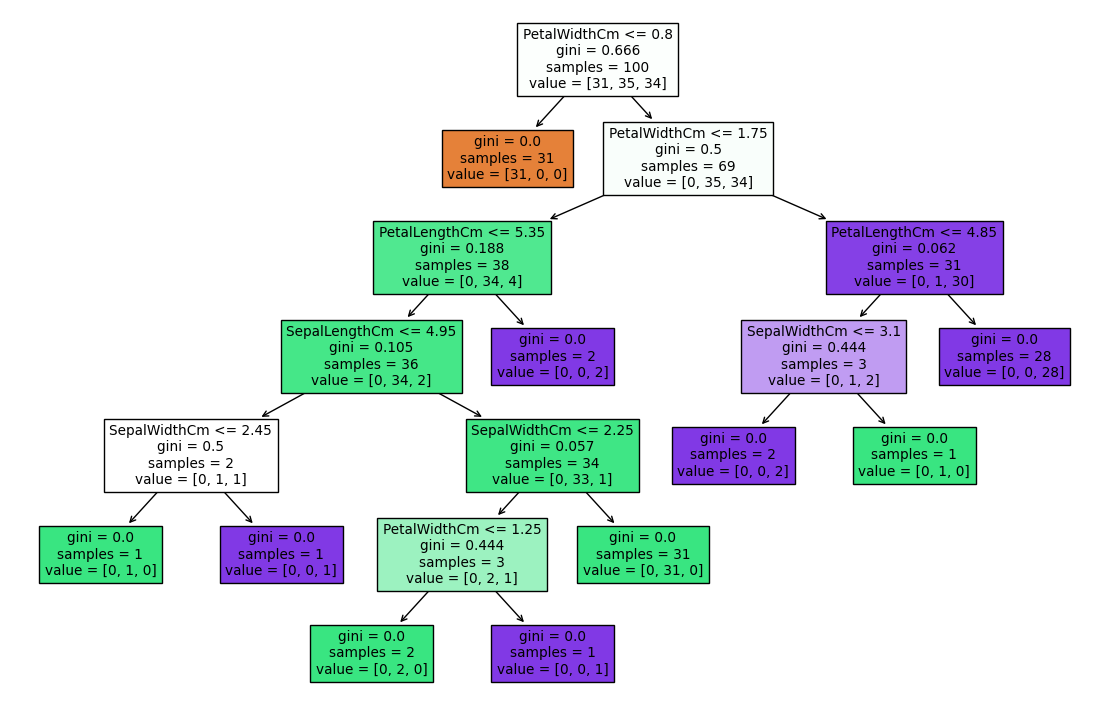

In [ ]:
plt.figure(figsize=(14,9))
tree.plot_tree(dtree, filled=True, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']);